# **Automatidata project**


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [67]:
# Imports
# Packages for numerics + dataframes
### YOUR CODE HERE ###
import numpy as np
import pandas as pd
# Packages for visualization
### YOUR CODE HERE ###
import seaborn as sns
import matplotlib.pyplot as plt
# Packages for date conversions for calculating trip durations
### YOUR CODE HERE ###
import datetime as dt
# Packages for OLS, MLR, confusion matrix
from statsmodels.formula.api import ols
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
### YOUR CODE HERE ###

In [3]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

### Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

In [4]:
# Start with `.shape` and `.info()`
### YOUR CODE HERE ###
df0.shape
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [5]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
df0.isna().sum()
df0 = df0.drop_duplicates()
### YOUR CODE HERE ###

In [7]:
# Check the format of the data
### YOUR CODE HERE ###
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [9]:
# Create `duration` column
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime'])/np.timedelta64(1,'m')
### YOUR CODE HERE ###

In [10]:
### YOUR CODE HERE ###
df0.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


### Box plots

{'whiskers': [<matplotlib.lines.Line2D at 0x71a8ded41dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x71a8ded4c890>,
 'boxes': [<matplotlib.lines.Line2D at 0x71a8ded417d0>],
 'medians': [<matplotlib.lines.Line2D at 0x71a8decd4390>],
 'fliers': [<matplotlib.lines.Line2D at 0x71a8decd48d0>],
 'means': []}

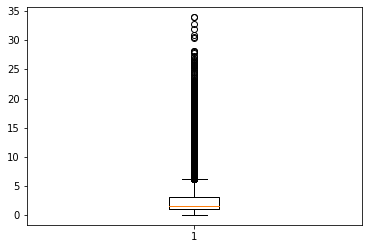

In [11]:
### YOUR CODE HERE ###
plt.boxplot(df0['trip_distance'])


{'whiskers': [<matplotlib.lines.Line2D at 0x71a8dec64890>,
 'caps': [<matplotlib.lines.Line2D at 0x71a8dec6b350>,
 'boxes': [<matplotlib.lines.Line2D at 0x71a8dec642d0>],
 'medians': [<matplotlib.lines.Line2D at 0x71a8dec6be10>],
 'fliers': [<matplotlib.lines.Line2D at 0x71a8dec72390>],
 'means': []}

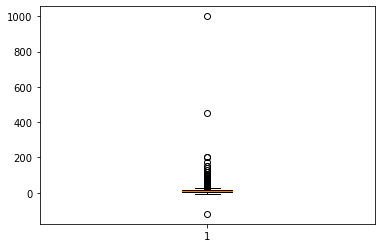

In [12]:
plt.boxplot(df0['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x71a8de9d5050>,
 'caps': [<matplotlib.lines.Line2D at 0x71a8de9d5ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x71a8de9cea90>],
 'medians': [<matplotlib.lines.Line2D at 0x71a8de9da5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x71a8de9dab10>],
 'means': []}

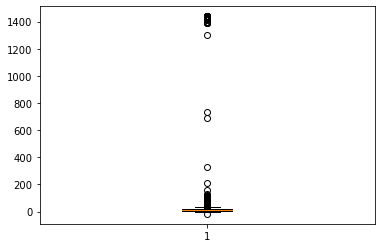

In [13]:
plt.boxplot(df0['duration'])

In [14]:
# Are trip distances of 0 bad data or very short trips rounded down?
df0.sort_values(by = 'trip_distance')
### YOUR CODE HERE ###


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
22026,63642923,1,2017-07-27 07:44:24,2017-07-27 07:44:24,1,0.00,1,N,41,264,2,10.50,0.0,0.5,0.00,0.00,0.3,11.30,0.000000
795,101135030,1,2017-11-30 07:11:34,2017-11-30 07:11:34,1,0.00,1,N,246,264,2,8.00,0.0,0.5,0.00,0.00,0.3,8.80,0.000000
6908,24162045,2,2017-03-26 02:07:08,2017-03-26 02:07:12,1,0.00,5,N,61,61,1,18.00,0.0,0.0,2.00,0.00,0.3,20.30,0.066667
13561,14504365,1,2017-02-23 16:06:31,2017-02-23 16:06:54,2,0.00,5,N,175,175,3,32.00,0.0,0.0,0.00,0.00,0.3,32.30,0.383333
12238,95544923,1,2017-11-11 09:28:13,2017-11-11 09:28:27,2,0.00,1,N,145,145,2,2.50,0.0,0.5,0.00,0.00,0.3,3.30,0.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38,209.166667
10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80,37.900000
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06,67.483333
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21,60.150000


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [15]:
### YOUR CODE HERE ###
print(len(df0[df0['trip_distance']==0]))

148


#### `fare_amount` outliers

In [16]:
### YOUR CODE HERE ###
df0.sort_values(by = 'fare_amount')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
12944,29059760,2,2017-04-08 00:00:16,2017-04-08 23:15:57,1,0.17,5,N,138,138,4,-120.00,0.0,0.0,0.00,0.00,-0.3,-120.30,1395.683333
11204,58395501,2,2017-07-09 07:20:59,2017-07-09 07:23:50,1,0.64,1,N,50,48,3,-4.50,0.0,-0.5,0.00,0.00,-0.3,-5.30,2.850000
20698,14668209,2,2017-02-24 00:38:17,2017-02-24 00:42:05,1,0.70,1,N,65,25,4,-4.50,-0.5,-0.5,0.00,0.00,-0.3,-5.80,3.800000
14714,109276092,2,2017-12-24 22:37:58,2017-12-24 22:41:08,5,0.40,1,N,164,161,4,-4.00,-0.5,-0.5,0.00,0.00,-0.3,-5.30,3.166667
17602,24690146,2,2017-03-24 19:31:13,2017-03-24 19:34:49,1,0.46,1,N,87,45,4,-4.00,-1.0,-0.5,0.00,0.00,-0.3,-5.80,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,107108848,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74,0.300000
15474,55538852,2,2017-06-06 20:55:01,2017-06-06 20:55:06,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80,0.083333
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21,60.150000
20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30,0.150000


**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [17]:
# Impute values less than $0 with 0
df0.loc[df0['fare_amount'] < 0, 'fare_amount'] = 0
df0.sort_values(by = 'fare_amount')
### YOUR CODE HERE ###

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
5448,28459983,2,2017-04-06 12:50:26,2017-04-06 12:52:39,1,0.25,1,N,90,68,3,0.00,0.0,-0.5,0.00,0.00,-0.3,-4.30,2.216667
14714,109276092,2,2017-12-24 22:37:58,2017-12-24 22:41:08,5,0.40,1,N,164,161,4,0.00,-0.5,-0.5,0.00,0.00,-0.3,-5.30,3.166667
11204,58395501,2,2017-07-09 07:20:59,2017-07-09 07:23:50,1,0.64,1,N,50,48,3,0.00,0.0,-0.5,0.00,0.00,-0.3,-5.30,2.850000
5758,833948,2,2017-01-03 20:15:23,2017-01-03 20:15:39,1,0.02,1,N,170,170,3,0.00,-0.5,-0.5,0.00,0.00,-0.3,-3.80,0.266667
12944,29059760,2,2017-04-08 00:00:16,2017-04-08 23:15:57,1,0.17,5,N,138,138,4,0.00,0.0,0.0,0.00,0.00,-0.3,-120.30,1395.683333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,107108848,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74,0.300000
15474,55538852,2,2017-06-06 20:55:01,2017-06-06 20:55:06,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80,0.083333
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21,60.150000
20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30,0.150000


Now impute the maximum value as `Q3 + (6 * IQR)`.

In [18]:
### YOUR CODE HERE ###
'''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
'''
  ### YOUR CODE HERE ###
        # Reassign minimum to zero
        ### YOUR CODE HERE ###

        # Calculate upper threshold
     ### YOUR CODE HERE ###
df0.loc[df0['fare_amount'] > 62.5, 'fare_amount'] = 62.5 
df0.describe()
        # Reassign values > threshold to threshold
      ### YOUR CODE HERE ###

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,12.897913,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,10.541137,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,62.500000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


#### `duration` outliers


In [19]:
# Call .describe() for duration outliers
df0.describe()
### YOUR CODE HERE ###

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,12.897913,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,10.541137,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,62.500000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [20]:
# Impute a 0 for any negative values
df0.loc[df0['duration']< 0, 'duration'] = 0
df0.describe()
### YOUR CODE HERE ###



,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,12.897913,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.014525
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,10.541137,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996174
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,0.000000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,62.500000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


In [21]:
# Impute the high outliers
df0.loc[df0['duration']> 18.42 +(6*6.67), 'duration'] = 18.42 +(6*6.67)
df0.describe()
### YOUR CODE HERE ###

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,12.897913,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,14.284480
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,10.541137,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,11.090670
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,0.000000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,62.500000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,58.440000


### Feature engineering

In [22]:
# Create `pickup_dropoff` column
df0['pickup_dropoff'] = df0['PULocationID'].astype(str) +' '+ df0['DOLocationID'].astype(str)
df0
#df0['pickup_dropoff'] = df['']
### YOUR CODE HERE ###

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14.066667,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,26.500000,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.200000,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,16.716667,4 112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,3.266667,48 186
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,40.800000,132 164
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,4.133333,107 234
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,11.933333,68 144


Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [23]:
### YOUR CODE HERE ###
grouped = df0.groupby('pickup_dropoff')['trip_distance'].mean()

In [24]:
# 1. Convert `grouped` to a dictionary
### YOUR CODE HERE ###
grouped_dict = grouped.to_dict()
grouped_dict
# 2. Reassign to only contain the inner dictionary
### YOUR CODE HERE ###

{'1 1': 2.433333333333333,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.25333333333333335,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 17.2175,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.841,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6404761904761904,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232': 3.8449999999999998,
 '100 233': 1.245833333333333

In [25]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
### YOUR CODE HERE ###
df0['mean_distance']= df0['pickup_dropoff']
df0
# 2. Map `grouped_dict` to the `mean_distance` column
### YOUR CODE HERE ###
df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)
df0
# Confirm that it worked
### YOUR CODE HERE ###


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14.066667,100 231,3.521667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.00,0.3,20.80,26.500000,186 43,3.108889
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.200000,262 236,0.881429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,188 97,3.700000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.00,0.3,17.80,16.716667,4 112,4.435000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,...,4.0,1.0,0.5,0.00,0.00,0.3,5.80,3.266667,48 186,1.098214
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,...,52.0,0.0,0.5,14.64,5.76,0.3,73.20,40.800000,132 164,18.757500
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,...,4.5,0.0,0.5,0.00,0.00,0.3,5.30,4.133333,107 234,0.684242
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,...,10.5,0.0,0.5,1.70,0.00,0.3,13.00,11.933333,68 144,2.077500


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [26]:
### YOUR CODE HERE ###

# Create a dictionary where keys are unique pickup_dropoffs and values are
grouped2 = df0.groupby('pickup_dropoff')['duration'].mean()
grouped2_dict = grouped2.to_dict()
grouped2_dict
# mean trip duration for all trips with those pickup_dropoff combos
### YOUR CODE HERE ###
df0['mean_duration'] = df0['pickup_dropoff']
df0['mean_duration'] = df0['mean_duration'].map(grouped2_dict)
df0
# Confirm that it worked
### YOUR CODE HERE ###


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.5,2.76,0.00,0.3,16.56,14.066667,100 231,3.521667,22.847222
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.5,4.00,0.00,0.3,20.80,26.500000,186 43,3.108889,24.470370
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.5,1.45,0.00,0.3,8.75,7.200000,262 236,0.881429,7.250000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,188 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.5,0.00,0.00,0.3,17.80,16.716667,4 112,4.435000,14.616667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,...,1.0,0.5,0.00,0.00,0.3,5.80,3.266667,48 186,1.098214,8.594643
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,...,0.0,0.5,14.64,5.76,0.3,73.20,40.800000,132 164,18.757500,51.743750
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,...,0.0,0.5,0.00,0.00,0.3,5.30,4.133333,107 234,0.684242,6.609091
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,...,0.0,0.5,1.70,0.00,0.3,13.00,11.933333,68 144,2.077500,16.650000


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [27]:
# Create 'day' col
### YOUR CODE HERE ###
df0['day'] = df0['tpep_pickup_datetime'].dt.day
df0['month'] = df0['tpep_pickup_datetime'].dt.month
df0
# Create 'month' col
### YOUR CODE HERE ###

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.00,0.3,16.56,14.066667,100 231,3.521667,22.847222,25,3
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.00,0.3,20.80,26.500000,186 43,3.108889,24.470370,11,4
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.00,0.3,8.75,7.200000,262 236,0.881429,7.250000,15,12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.00,0.3,27.69,30.250000,188 97,3.700000,30.250000,7,5
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.00,0.3,17.80,16.716667,4 112,4.435000,14.616667,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,...,0.00,0.00,0.3,5.80,3.266667,48 186,1.098214,8.594643,24,2
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,...,14.64,5.76,0.3,73.20,40.800000,132 164,18.757500,51.743750,6,8
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,...,0.00,0.00,0.3,5.30,4.133333,107 234,0.684242,6.609091,4,9
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,...,1.70,0.00,0.3,13.00,11.933333,68 144,2.077500,16.650000,15,7


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [28]:
# Create 'rush_hour' col
### YOUR CODE HERE ###
df0['rush_hour'] = df0['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df0.loc[df0['day'].isin(['saturday', "sunday"]), 'rush_hour'] = 0
df0.describe()
### YOUR CODE HERE ###

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,mean_distance,mean_duration,day,month,rush_hour
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,...,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,12.897913,0.333275,...,1.835781,0.312542,0.299551,16.310502,14.284480,2.913313,14.284480,15.597383,6.422442,13.726552
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,10.541137,0.463097,...,2.800626,1.399212,0.015673,16.097295,11.090670,3.558993,9.591277,8.718297,3.464777,6.224675
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,...,0.000000,0.000000,-0.300000,-120.300000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,...,0.000000,0.000000,0.300000,8.750000,6.650000,1.010000,8.030952,8.000000,3.000000,9.000000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,...,1.350000,0.000000,0.300000,11.800000,11.183333,1.620000,11.503978,16.000000,6.000000,14.000000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,...,2.450000,0.000000,0.300000,17.800000,18.383333,3.115625,17.290000,23.000000,10.000000,19.000000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,62.500000,4.500000,...,200.000000,19.100000,0.300000,1200.290000,58.440000,33.920000,58.440000,31.000000,12.000000,23.000000


In [29]:
### YOUR CODE HERE ###
def rush_hour(hour):
    if (hour['rush_hour'] >= 6 and hour['rush_hour'] <=10) or (hour['rush_hour'] >= 16 and hour['rush_hour'] <= 20):
        value = 1
    else:
        value = 0
    return value


In [30]:
# Apply the `rush_hourizer()` function to the new column
df0.loc[(df0.day != 'saturday') & (df0.day != 'sunday'), 'rush_hour'] = df0.apply(rush_hour, axis=1)
df0.head()
### YOUR CODE HERE ###

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,25,3,1
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,11,4,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,15,12,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,7,5,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,15,4,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

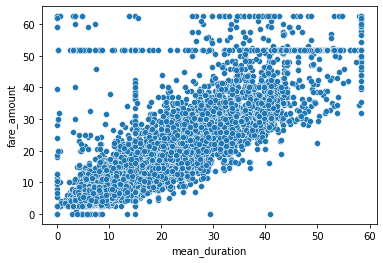

In [31]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.scatterplot(data = df0, x = 'mean_duration', y = 'fare_amount')
### YOUR CODE HERE ###


The `mean_duration` variable correlates with the target variable. 

In [32]:
### YOUR CODE HERE ###
df0[df0['fare_amount'] == 52]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,...,5.54,0.3,72.92,36.800000,236 132,19.211667,35.442778,5,3,1
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,...,0.00,0.3,52.80,58.440000,132 163,19.229000,47.669333,3,6,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,...,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,11,11,1
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,...,0.00,0.3,52.80,29.183333,132 79,19.431667,43.262222,6,12,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,...,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,24,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22593,1690610,1,2017-01-20 18:05:09,2017-01-20 19:12:50,1,15.40,2,N,211,132,...,0.00,0.3,57.30,58.440000,211 132,16.580000,57.070000,20,1,1
22604,20742961,1,2017-03-12 17:56:04,2017-03-12 18:40:47,2,23.00,2,N,230,132,...,5.54,0.3,58.34,44.716667,230 132,18.148750,53.211667,12,3,1
22620,52171010,2,2017-06-19 20:24:09,2017-06-19 21:01:04,3,20.96,2,N,132,261,...,0.00,0.3,58.30,36.916667,132 261,22.115000,47.491250,19,6,1
22686,9039930,2,2017-02-08 18:13:26,2017-02-08 19:34:11,5,10.64,1,N,170,70,...,5.54,0.3,74.18,58.440000,170 70,10.640000,58.440000,8,2,1


### Isolate modeling variables

In [34]:
### YOUR CODE HERE ###
df2 = df0.copy()[['mean_duration', 'fare_amount', 'mean_distance']]

In [35]:
### YOUR CODE HERE ###
df2

,mean_duration,fare_amount,mean_distance
0,22.847222,13.0,3.521667
1,24.470370,16.0,3.108889
2,7.250000,6.5,0.881429
3,30.250000,20.5,3.700000
4,14.616667,16.5,4.435000
...,...,...,...
22694,8.594643,4.0,1.098214
22695,51.743750,52.0,18.757500
22696,6.609091,4.5,0.684242
22697,16.650000,10.5,2.077500


###  Pair plot

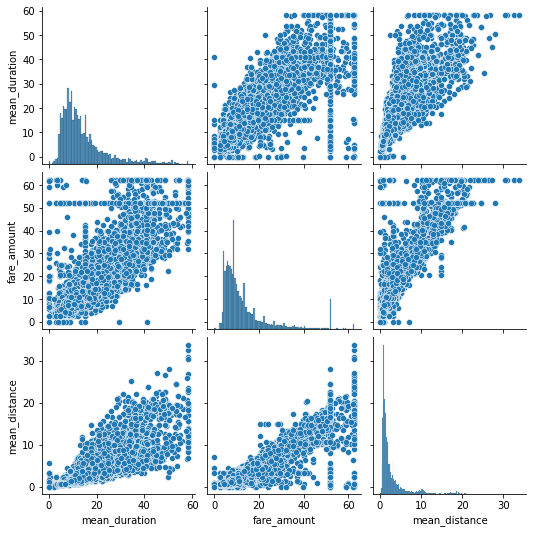

In [36]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2)
### YOUR CODE HERE ###

### Task 7. Identify correlations

In [37]:
# Correlation matrix to help determine most correlated variables
df3 = df0.copy()[['VendorID', 'passenger_count', 'trip_distance', 'mean_duration', 'mean_distance', 'rush_hour', 'fare_amount']]
### YOUR CODE HERE ###

Visualize a correlation heatmap of the data.

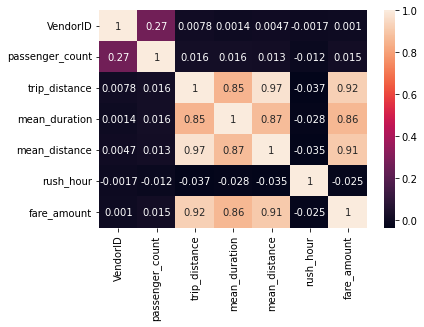

In [38]:
# Create correlation heatmap
df3.corr()
sns.heatmap(df3.corr(), annot=True)
### YOUR CODE HERE ###

In [55]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
### YOUR CODE HERE ###
df4 = df3.drop(columns = 'fare_amount')
# Set y variable
### YOUR CODE HERE ###
y = df3[['fare_amount']]
# Display first few rows
### YOUR CODE HERE ###
y.head()

,fare_amount
0,13.0
1,16.0
2,6.5
3,20.5
4,16.5


### Pre-process data


In [72]:
# Convert VendorID to string
### YOUR CODE HERE ###
df4['VendorID'] = df4['VendorID'].astype(str)
dummies = pd.get_dummies(df4)
# Get dummies
### YOUR CODE HERE ###
dummies

,passenger_count,trip_distance,mean_duration,mean_distance,rush_hour,VendorID_1,VendorID_2
0,6,3.34,22.847222,3.521667,1,0,1
1,1,1.80,24.470370,3.108889,0,1,0
2,1,1.00,7.250000,0.881429,1,1,0
3,1,3.70,30.250000,3.700000,0,0,1
4,1,4.37,14.616667,4.435000,0,0,1
...,...,...,...,...,...,...,...
22694,3,0.61,8.594643,1.098214,1,0,1
22695,1,16.71,51.743750,18.757500,1,0,1
22696,1,0.42,6.609091,0.684242,0,0,1
22697,1,2.36,16.650000,2.077500,0,0,1


### Split data into training and test sets

In [73]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dummies, y)
#### YOUR CODE HERE ####


### Standardize the data

In [74]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
### YOUR CODE HERE ###

### Fit the model

In [75]:
# Fit your model to the training data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


### YOUR CODE HERE ###

### Task 8c. Evaluate model

### Train and test data

In [79]:
# Evaluate the model performance on the training data
y_pred_train = lr.predict(X_train_scaled)
print(lr.score(X_train_scaled, y_train))
print(mean_absolute_error(y_train, y_pred_train))
print(r2_score(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))
### YOUR CODE HERE ###

0.8724243988712355
1.7249474199846213
0.8724243988712355
13.992460881324678


In [80]:
# Scale the X_test data
scaler2 = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)
### YOUR CODE HERE ###

In [82]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###
y_pred_test = lr.predict(X_test_scaled)
print(lr.score(X_test_scaled, y_test))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_test, y_pred_test))
print(mean_squared_error(y_test, y_pred_test))


0.8823674975999458
1.7317357538780807
0.8823674975999458
13.57460611292579


In [86]:
# Create a `results` dataframe
results = pd.DataFrame({'Actual':y_test['fare_amount'], 'Predicted':y_pred_test.ravel()})
results['residuals'] = results['Actual'] - results['Predicted']
results
### YOUR CODE HERE ###



,Actual,Predicted,residuals
10720,7.0,8.566320,-1.566320
17318,7.5,6.804649,0.695351
18154,3.0,4.108502,-1.108502
11544,7.5,7.952172,-0.452172
18295,7.5,7.432635,0.067365
...,...,...,...
13379,8.5,7.593143,0.906857
14677,8.0,7.693828,0.306172
19885,8.5,8.275578,0.224422
2102,6.0,7.783164,-1.783164


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

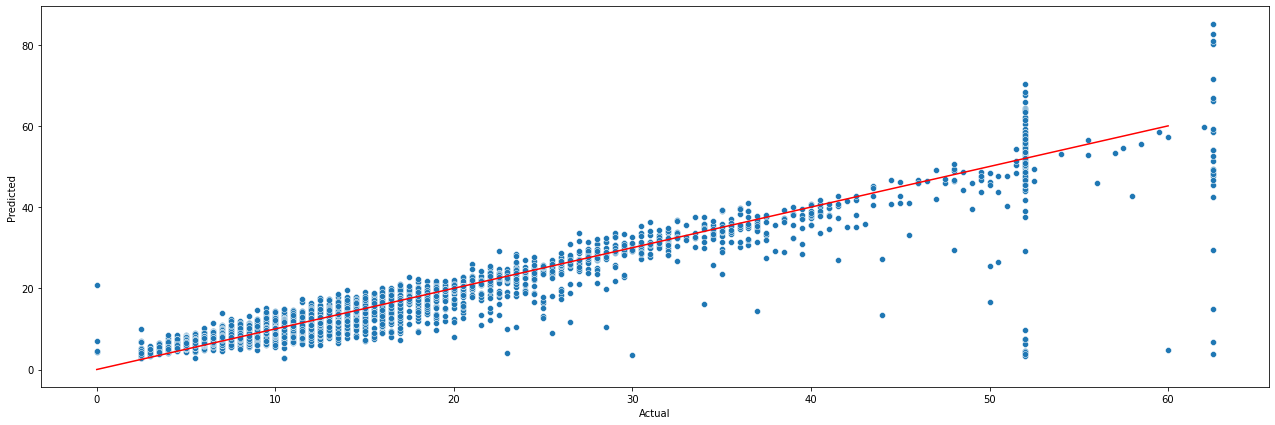

In [91]:
# Create a scatterplot to visualize `predicted` over `actual`
plt.figure(figsize = (22,7))
sns.scatterplot(data = results, x = 'Actual', y = 'Predicted')
plt.plot([0,60],[0,60], color = 'Red')
### YOUR CODE HERE ###

Visualize the distribution of the `residuals` using a histogram.

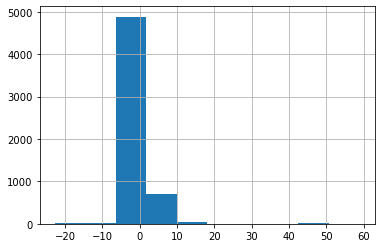

In [92]:
# Visualize the distribution of the `residuals`
results['residuals'].hist()
### YOUR CODE HERE ###



In [93]:
# Calculate residual mean
results['residuals'].mean()
### YOUR CODE HERE ###

0.03009650188157654

Create a scatterplot of `residuals` over `predicted`.

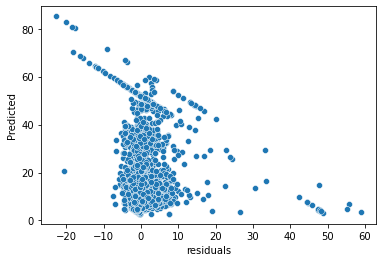

In [94]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(data = results,x ='residuals', y = 'Predicted')
### YOUR CODE HERE ###

### Coefficients

In [95]:
# Output the model's coefficients
lr.coef_

array([[-0.01615203,  7.87952524,  2.915797  , -0.70924103,  0.07918634,
         0.01030068, -0.01030068]])

trip diatance and mean duration had the highest impact among all of them